<a href="https://colab.research.google.com/github/KevinaZeni/Hypothyroid-detection/blob/main/hypothyroid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothyroid detection

#**Overview**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.
**Data Source: ** https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284

**Defining the research question**

Use the healthcare datasets provided to Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**Data Glossary**

Age
Sex
on_thyroxine
query_on_thyroxine
on_antithyroid_medicationthyroid_surgery
query_hypothyroid
query_hyperthyroid
pregnant
sick
tumor
lithium
goitre
TSH_measured
TSH
T3_measured
T3
TT4_measured
TT4

**Metrics of success**

Being able to create models that accurately detect hypothyrodism and identifying the most important features in doing so 

**Model**

*   Decision Trees
*   Random Forest
*   SVM (linear, polynomial, rbf, sigmoid)




**Experimental Design Steps**

Data Preparation, Perform univariate, bivariate and multivariate analysis recording your observations.
Use the models listed above to predict the status of the patients.



#**Data Preparation**

**Importing our libraries**

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

**Loading our datasets**

In [2]:
##Hypothyroid dataset

hypothyroid = pd.read_csv('hypothyroid.csv')

**Previewing our dataset**

In [3]:
#Previewng the first ten records

hypothyroid.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [4]:
#Previewing the last ten records

hypothyroid.tail(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3153,negative,78,F,f,f,f,f,f,t,f,f,f,f,f,y,0,y,1.70,y,106,y,1.03,y,99,n,?
3154,negative,72,F,t,f,f,f,f,f,f,f,f,f,f,y,0.01,y,1.10,y,240,y,1.07,y,223,n,?
3155,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,2.40,y,123,y,0.99,y,124,n,?
3156,negative,40,F,f,f,f,f,f,f,f,t,f,f,f,y,2.10,y,1.20,y,76,y,0.90,y,84,n,?
3157,negative,69,F,f,f,f,f,f,f,f,f,f,f,f,y,2.60,y,1.80,y,126,y,1.02,y,124,n,?
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


**Basic Information about our dataset**

In [5]:
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
#Exploring the columns in our dataset
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [7]:
##Checking for uniques values in our variables
hypothyroid.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [8]:
#confirming the unique values
for i in hypothyroid.columns:
 print(f'Column: {i} \n') 
 print(hypothyroid[i].unique())
 print("\n")

Column: status 

['hypothyroid' 'negative']


Column: age 

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column: sex 

['M' 'F' '?']


Column: on_thyroxine 

['f' 't']


Column: query_on_thyroxine 

['f' 't']


Column: on_antithyroid_medication 

['f' 't']


Column: thyroid_surgery 

['f' 't']


Column: query_hypothyroid 

['f' 't']


Column: query_hyperthyroid 

['f' 't']


Column: pregnant 

['f' 't']


Column: sick 

['f' 't']


Column: tumor 

['f' 't']


Column: lithium 

['f' 't']


Column: goitre 

['f' 't']


Column: TSH_measured 

['y' 'n']


Column: TSH 

['30' 

In [9]:
hypothyroid.shape

(3163, 26)

In [10]:
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

#**Data Cleaning**

**Checking our dtypes**

In [11]:
#Listing our float variables

float_ = [feature for feature in hypothyroid.columns if hypothyroid[feature].dtypes != 'float']

print('Number of numerical variables:', len(float_))

#Visualizing the numerical variables
hypothyroid[float_].head()

Number of numerical variables: 26


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [12]:
# Listing our numerical variables
numerical_ = [feature for feature in hypothyroid.columns if hypothyroid[feature].dtypes != 'int']

print('Number of numerical variables:', len(numerical_))

#Visualizing the numerical variables
hypothyroid[numerical_].head()

Number of numerical variables: 26


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [13]:
#Listing our categorical variables
cat_ = [feature for feature in hypothyroid.columns if hypothyroid[feature].dtypes == 'O']

print('Number of categorical variables:', len(cat_))

#Visualizing the numerical variables
hypothyroid[cat_].head()

Number of categorical variables: 26


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


**Checking of null values**

In [14]:
##We will assign our missing values denoted by ?,to a nAN container
##Replacing the question mark (?) with Nan

hypothyroid.replace('?',np.NaN,inplace= True)

In [15]:
##We will convert some of our variables into cat and int types


hypothyroid[["age", "TSH", "T3", "TT4", "T4U", "FTI"]] = hypothyroid[["age", "TSH", "T3", "TT4", "T4U", "FTI"]].astype("float")

#columns = ["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured"]


#for column in hypothyroid.columns:
#    if hypothyroid[column].dtype == 'float':
#        hypothyroid[column] = housing[column].astype(np.int)

In [16]:
hypothyroid.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

In [17]:
hypothyroid.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [18]:
##Most of our values in the TBG column and TBG_measured are null so we will drop them 

hypothyroid.drop(['TBG','TBG_measured'], axis=1, inplace=True)

In [19]:
##onfriming we no longer have missing values

hypothyroid.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
dtype: int64

In [20]:
##We will als try to fill our missing values in the Sex column 
hypothyroid['sex'] = hypothyroid['sex'].fillna("unknown")

In [21]:
#We will now fill the rest of the missing values with 0

hypothyroid.fillna(0, inplace=True)

In [22]:
hypothyroid.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
dtype: object

In [23]:
## We will try to fill our missing values in the age column with the 'age' mean value
#hypothyroid['age'] = hypothyroid['age'].fillna(hypothyroid['age'].mean(), axis=0, inplace=True)

hypothyroid['age']= hypothyroid['age'].fillna(hypothyroid['age'].mean(), axis = 0)

**checking for outliers**

In [24]:
##We will use perentiles to check for our outliers

min_threshold = .25
max_threshold = .75
quant_df = hypothyroid.quantile([min_threshold, max_threshold])
print(quant_df.sum())

age     91.00
TSH      1.80
T3       2.70
TT4    200.00
T4U      1.87
FTI    211.00
dtype: float64


In [25]:
##hypothyroid[(hypothyroid['TSH']<max_threshold) & (hypothyroid['TSH']>min_threshold)]

In [26]:
##hypothyroid[(hypothyroid['T4U']<max_threshold) & (hypothyroid['T4U']>min_threshold)]

We will not drop the rest of the outliers since there is a number of them and measurments such as the TSH (thyroid-stimulating hormone) test and T4 tests are crucial to hypothyroid detection

**Checking for duplicates**

In [27]:
#we will look for the number of rows with duplicate records
print(hypothyroid.duplicated().sum())


##We will the view our duplicated records to confirm that they are indeed duplicated

print(hypothyroid[hypothyroid.duplicated()].head())
print(hypothyroid[hypothyroid.duplicated()].tail())

##Our duplicated records don't actually seem like duplicated hence we will not drop them




152
          status   age sex on_thyroxine  ... T4U_measured   T4U FTI_measured   FTI
53   hypothyroid  69.0   F            f  ...            y  0.86            y  61.0
66   hypothyroid  62.0   M            f  ...            y  1.00            y  10.0
124  hypothyroid  77.0   F            f  ...            y  0.67            y  49.0
128  hypothyroid  79.0   F            f  ...            y  0.97            y  48.0
131  hypothyroid  50.0   F            t  ...            y  0.93            y  60.0

[5 rows x 24 columns]
        status   age sex on_thyroxine  ... T4U_measured   T4U FTI_measured    FTI
3066  negative  74.0   F            t  ...            y  1.18            y  107.0
3071  negative   0.0   F            f  ...            n  0.00            n    0.0
3111  negative  89.0   M            f  ...            y  0.80            y  103.0
3124  negative  40.0   F            f  ...            n  0.00            n    0.0
3151  negative  58.0   F            f  ...            y  1.40    

#**Exploratory Data Analysis**

In [28]:
##Checking the descriptive summary of our analysis
hypothyroid.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,43.941195,5.046782,1.513531,100.281031,0.901502,106.386310
std,25.235169,22.160083,1.191836,52.588757,0.341286,65.607474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.500000,76.000000,0.820000,85.000000
50%,48.000000,0.400000,1.600000,100.000000,0.940000,105.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


*Measures of central tendancy**

In [29]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [30]:
#MEAN
colums_ = hypothyroid[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]

for i, col_val in enumerate(colums_):
 print('The mean of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].mean()))

The mean of age is 43.941195067973446
The mean of TSH is 5.046781536515964
The mean of T3 is 1.5135314574770784
The mean of TT4 is 100.28103066708822
The mean of T4U is 0.901501738855515
The mean of FTI is 106.38631046474866


In [31]:
## MEDIAN

colums_ = hypothyroid[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]

for i, col_val in enumerate(colums_):
 print('The median of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].median()))


The median of age is 48.0
The median of TSH is 0.4
The median of T3 is 1.6
The median of TT4 is 100.0
The median of T4U is 0.94
The median of FTI is 105.0


In [32]:
colums_ = hypothyroid[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]

for i, col_val in enumerate(colums_):
 print('The mode of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].mode()))

The mode of age is 0    0.0
dtype: float64
The mode of TSH is 0    0.0
dtype: float64
The mode of T3 is 0    0.0
dtype: float64
The mode of TT4 is 0    0.0
dtype: float64
The mode of T4U is 0    0.0
dtype: float64
The mode of FTI is 0    0.0
dtype: float64


In [33]:
#SKEWNESS
for i, col_val in enumerate(colums_):
 print('The skewness of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].skew()))

The skewness of age is -0.35659020779789724
The skewness of TSH is 11.04189326628568
The skewness of T3 is 1.1394461536969123
The skewness of TT4 is 0.693851580480299
The skewness of T4U is -0.91477893193258
The skewness of FTI is 3.6332812907092933


In [34]:
##KUROSIS

for i, col_val in enumerate(colums_):
 print('The kurtosis of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].kurt()))

The kurtosis of age is -0.9233464171736903
The kurtosis of TSH is 178.5531388477672
The kurtosis of T3 is 4.457922036707946
The kurtosis of TT4 is 3.873764608927379
The kurtosis of T4U is 2.3202979478977444
The kurtosis of FTI is 32.531516756574135


**Univariate visualizations**

In [35]:
##Confirming the frequency of our status column
hypothyroid.status.value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [36]:
##Confirming the frequency of gender in the sex column
hypothyroid.sex.value_counts()

F          2182
M           908
unknown      73
Name: sex, dtype: int64

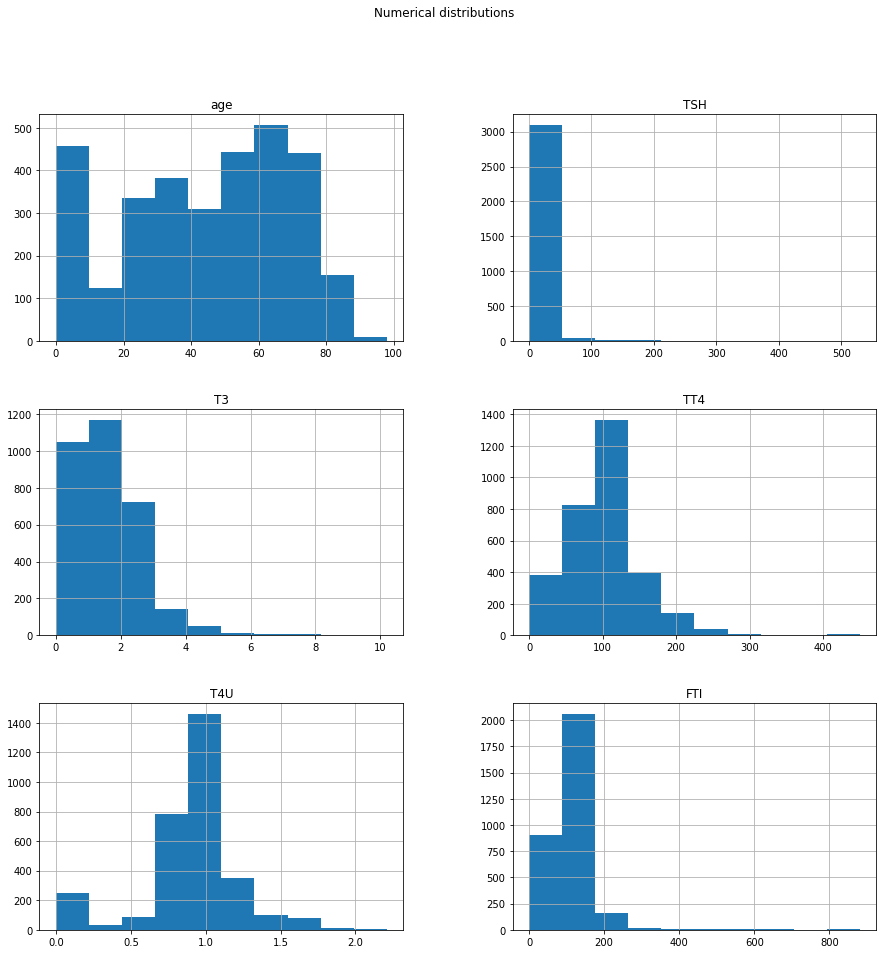

In [37]:
hypothyroid.hist(bins=10, figsize=(15,15))
plt.suptitle("Numerical distributions")
plt.savefig('Histogram')
plt.show()

In [38]:
##Univariate Analysis Summaries

#Of the persons who tested for hypothyrodism:
#Majority of those who took the test were femaile
#Majority of the tests came out negative
#Persons around the age bracket of 60-70 consisted of the majority test takers


**Bivariate Analysis**

We will find the distribution and try to discover relationships between our features

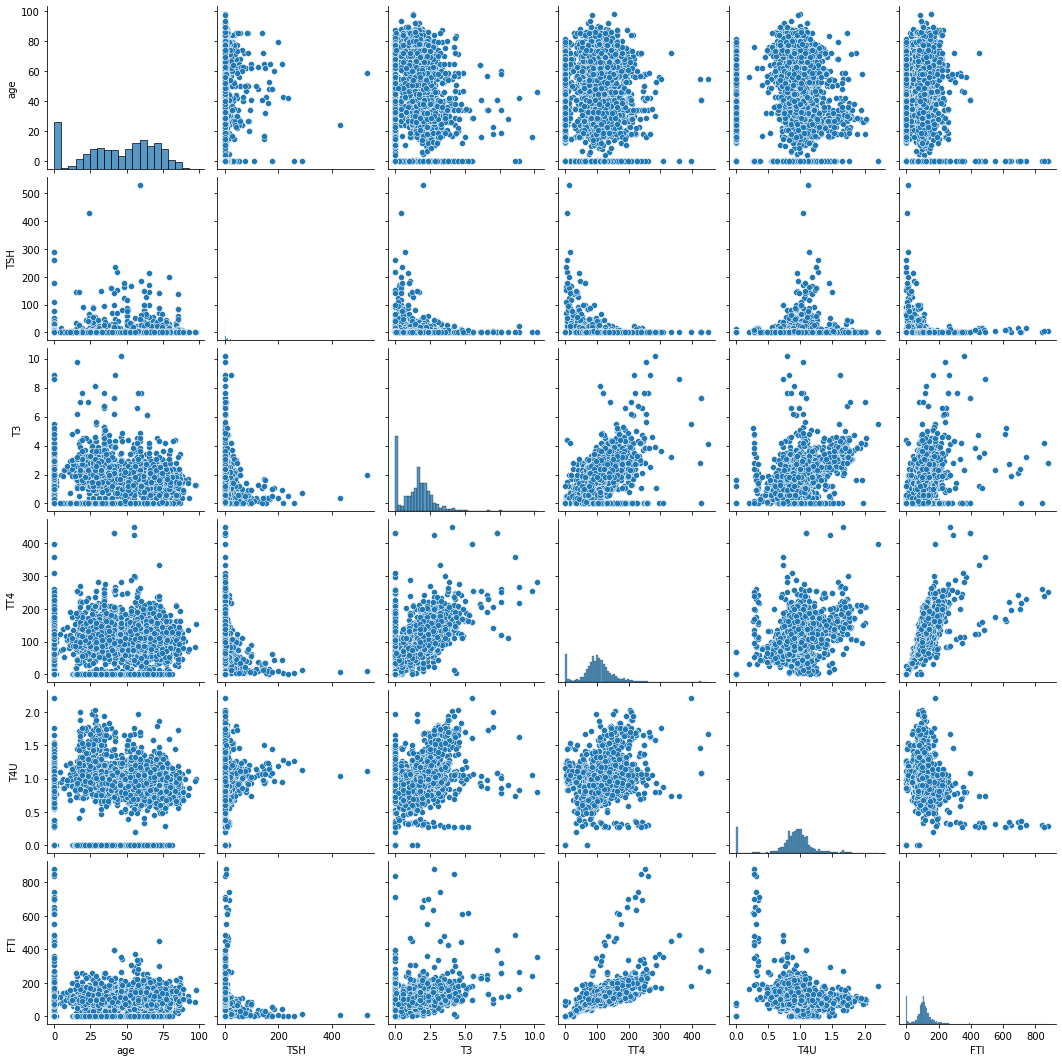

In [39]:
sns.pairplot(hypothyroid)
plt.show()

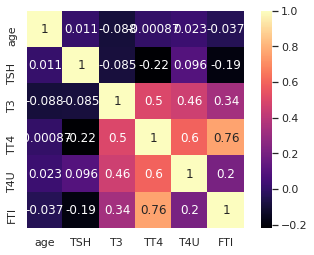

In [40]:
##We will use a heatmap to visualise the correlation between different variables in our dataset
corr = hypothyroid.corr()
sns.set(font_scale=1)
sns.heatmap(corr,vmax=1, cmap= 'magma', annot=True, square=True)
plt.show()

**Feature Engineering and EDA 2**

In [41]:
##We will convert our obj data into categorical data and manipluate our data into indiator variables

In [42]:

hypothyroid[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured"]] =hypothyroid[[
  "status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured"]].astype('category')

In [43]:
#converting categorical values to indicator variables

columns=["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured"]
from sklearn.preprocessing import LabelEncoder
for col in columns:
  labelencoder = LabelEncoder()
  
  labelencoder.fit(hypothyroid[col])
  hypothyroid[col] = labelencoder.transform(hypothyroid[col])
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   int64  
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   int64  
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

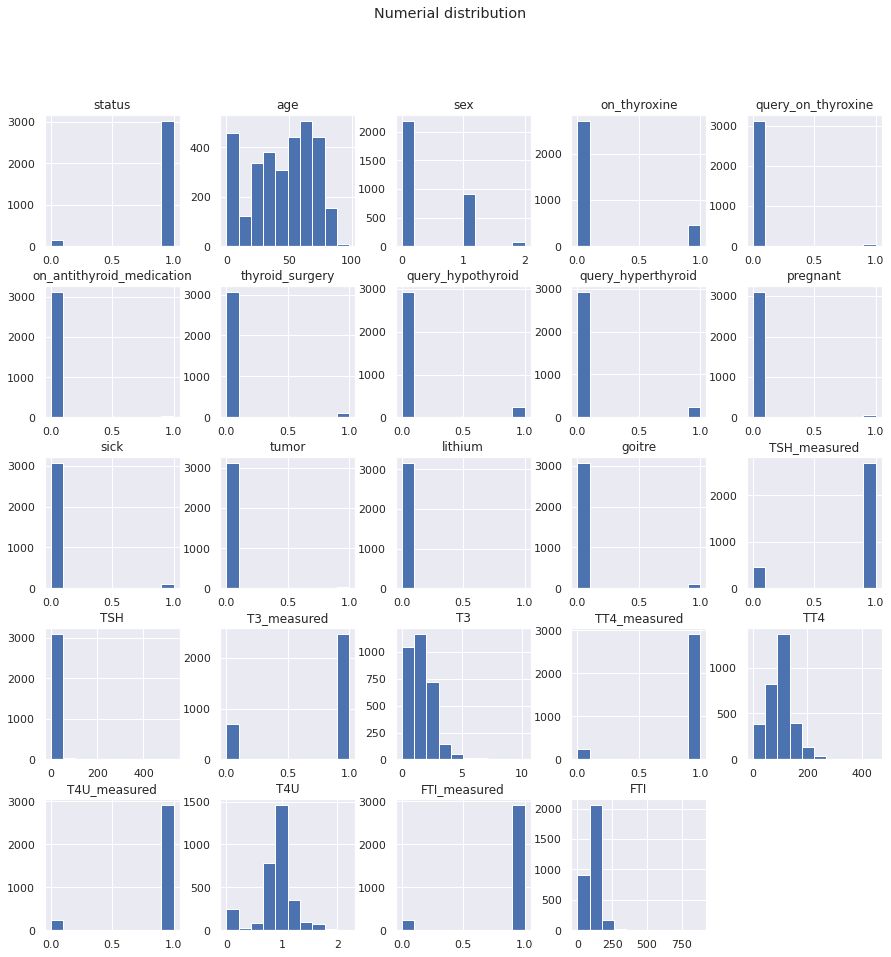

In [44]:
##Visualizing the distribution of our converted columns

hypothyroid.hist(bins=10, figsize=(15,15))
plt.suptitle("Numerial distribution")
plt.savefig('Histogram')
plt.show()

In [45]:
##We can now check the relationship between different variables and our y(status) variables

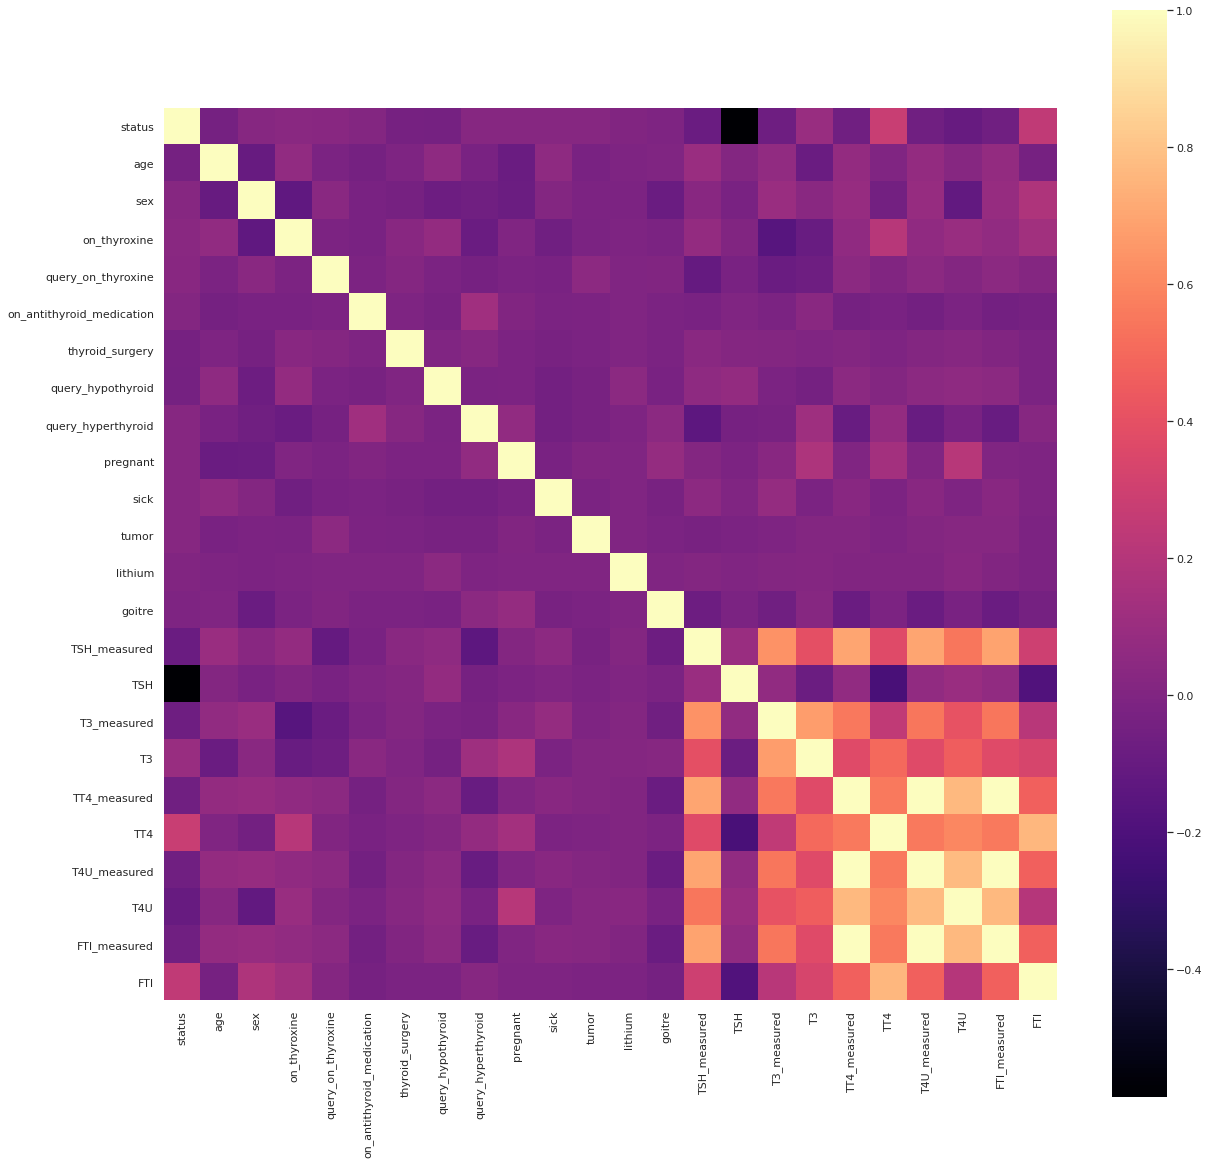

In [46]:
##Checking the correlation after encoding

corr = hypothyroid.corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(corr,vmax=1, cmap= 'magma', annot=False, square=True)
plt.show()

In [47]:
corr_list= corr['status'].sort_values(axis=0,ascending=False)
corr_list

status                       1.000000
TT4                          0.276137
FTI                          0.248052
T3                           0.091512
on_thyroxine                 0.033652
query_on_thyroxine           0.029785
query_hyperthyroid           0.025616
tumor                        0.025340
sex                          0.023808
sick                         0.023216
pregnant                     0.021306
on_antithyroid_medication    0.013020
lithium                      0.005632
goitre                      -0.010847
thyroid_surgery             -0.041868
age                         -0.044011
query_hypothyroid           -0.047477
FTI_measured                -0.065165
T4U_measured                -0.065308
TT4_measured                -0.065451
T3_measured                 -0.068682
TSH_measured                -0.089129
T4U                         -0.102045
TSH                         -0.587842
Name: status, dtype: float64

We will now perform LDA to determine which variables discriminate between two or more naturally occurring groups in our dataset.

In [48]:
##Creating a copy of our dataset
df = hypothyroid.copy()

In [49]:
##Previewing the first ten records of our dataset
df.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0
5,0,85.0,0,0,0,0,0,1,0,0,0,0,0,0,1,138.0,1,1.1,1,27.0,1,1.19,1,23.0
6,0,64.0,0,0,0,0,1,0,0,0,0,0,0,0,1,7.7,1,1.3,1,54.0,1,0.86,1,63.0
7,0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,21.0,1,1.9,1,34.0,1,1.05,1,32.0
8,0,20.0,0,0,0,0,0,1,0,0,0,0,0,0,1,92.0,0,0.0,1,39.0,1,1.21,1,32.0
9,0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,1,48.0,0,0.0,1,7.6,1,1.02,1,7.5


In [50]:
##Defining our X and y variables

X = df.drop(columns= ['status'])
y = df.status

In [51]:
#Import linear Doscriminant analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#create an instance of LDA
lda=LDA()
lda_=lda.fit(X,y)
lda_x=lda_.transform(X)
lda_.coef_

array([[-0.0101387 ,  0.12221963, -0.22677273,  0.87376874,  1.0968667 ,
        -1.04128337,  0.02594053, -0.98681067,  1.13147133,  1.25114565,
         1.31749123,  3.80217057, -1.20493522, -0.57544154, -0.17289776,
        -0.229373  ,  0.1248446 , -8.64509837,  0.06927998, 10.13751814,
        -7.72666686, -0.07475625, -0.01728742]])

In [52]:
#creating a dataframe to get the name of the columns and their coefficients
df=pd.DataFrame(index=X.columns.values,data=lda_.coef_[0].T)
df.sort_values(0,ascending=False)

,0
T4U_measured,10.137518
lithium,3.802171
tumor,1.317491
sick,1.251146
pregnant,1.131471
on_antithyroid_medication,1.096867
query_on_thyroxine,0.873769
T3,0.124845
sex,0.122220
TT4,0.069280


#**Building our Models**

In [53]:
#Our first task of classification, since our target variable is categorical is to predict whether a person tests negative or not for hypothyrodism based on the features (tests conducted) on the persons.
#For our first model, we will use decision trees and try to optimize the models to find one with the most accuracy.

In [54]:
#Importing our Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [55]:
##We will first try to fit the default features given to experiment with our model


In [56]:
# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 

data = hypothyroid.copy()

y = data.status
X = data.drop(columns= ['status'])

# Standardizing our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
# Create a decision tree classifier


tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
##According to our results, our model accuracy is 98% accurate in achieeving correct hypothyroid predictions. We will compare this results with other advanced decision tree models while selecting the important features.

Mean Absolute Error: 0.01791359325605901
Mean Squared Error: 0.01791359325605901
Root Mean Squared Error: 0.1338416723448232
Accuracy: 0.982086406743941


In [58]:
##Lets compare these results to using random forest model. We will use all the default features

In [59]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})



In [60]:
##Lets now evaluate the accuracy of this model compared our baseline model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

##Our models seem to be performing too well, our random forest classifier is at a 98% accuracy level.

Accuracy: 0.9831401475237092


In [61]:
##Lets see how our model performed using r2 scores and model scores 

from sklearn.metrics import r2_score

print ('Training_score: ', forest.score(X_train,y_train))
print ('Test_score: ', r2_score(y_test, y_pred))

Training_score:  0.990063233965673
Test_score:  0.5721611721611721


In [62]:
#To avoid over-fitting in random forest, the main thing you need to do is optimize a tuning parameter that governs the number of features that are randomly chosen to grow each tree from the bootstrapped data

In [63]:
##We will use grid search to tune our parameters and tune our model
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

##Creating a dictionary of parameters to tune
parameters = {'n_estimators': np.arange(50),
         'max_depth': np.arange(10)}

# Setting the number of folds to 5 and instantiating the model
# 

grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, return_train_score = True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

#Lets see how the different max depth values compare to each other
print('how do the different depths compare to each other''\n')
for i in range(len(parameters['max_depth'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])


print('\n')

{'max_depth': 8, 'n_estimators': 32}


how do the different depths compare to each other

parameters {'max_depth': 0, 'n_estimators': 0}
mean Test scores: nan
Rank: 500
parameters {'max_depth': 0, 'n_estimators': 1}
mean Test scores: nan
Rank: 467
parameters {'max_depth': 0, 'n_estimators': 2}
mean Test scores: nan
Rank: 466
parameters {'max_depth': 0, 'n_estimators': 3}
mean Test scores: nan
Rank: 465
parameters {'max_depth': 0, 'n_estimators': 4}
mean Test scores: nan
Rank: 454
parameters {'max_depth': 0, 'n_estimators': 5}
mean Test scores: nan
Rank: 463
parameters {'max_depth': 0, 'n_estimators': 6}
mean Test scores: nan
Rank: 462
parameters {'max_depth': 0, 'n_estimators': 7}
mean Test scores: nan
Rank: 461
parameters {'max_depth': 0, 'n_estimators': 8}
mean Test scores: nan
Rank: 460
parameters {'max_depth': 0, 'n_estimators': 9}
mean Test scores: nan
Rank: 459




In [64]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = grid_search.best_params_['n_estimators'], max_depth = grid_search.best_params_['max_depth']).fit(X_train, y_train)

y_pred = forest_model.predict(X_test)
print('Training score:', forest_model.score(X_train, y_train))
print('Test score:', r2_score(y_test, y_pred))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Training score: 0.999096657633243
Test score: 0.6523809523809524
Mean Absolute Error: 0.0136986301369863
Mean Squared Error: 0.0136986301369863
Root Mean Squared Error: 0.11704114719613055


In [65]:
##Our scores difference are still really high but it slighly improved after hyperparameter tuning. We will build other models and compare their performance

**Feature Importance**

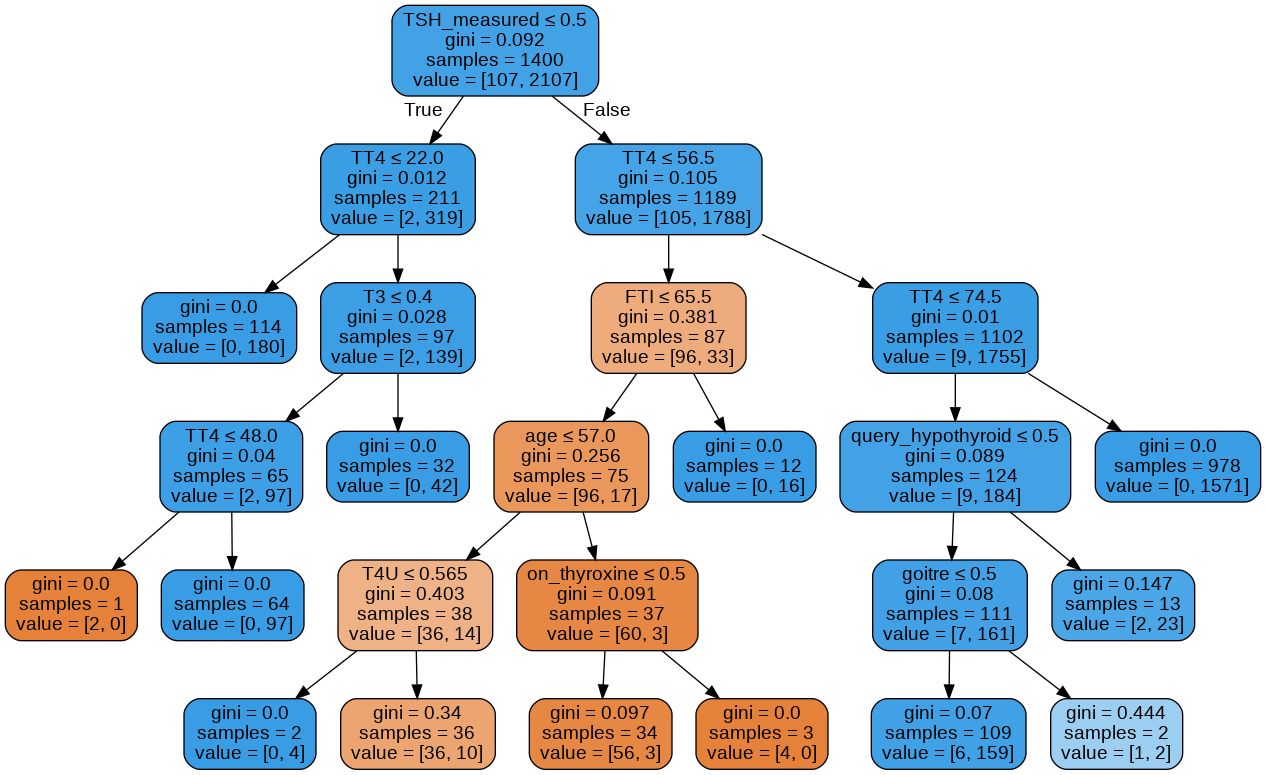

In [66]:
##
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_names = X.columns
test_features = feature_names

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())


In [67]:
#After creating a random forest, the model has a very strong sense of which features matter most.

# get numerical feature importances 

importances = list(forest.feature_importances_)

# list of tuples with variable and importance

feature_importances = [(feature, round(importance,2)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()

# We will sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.03), ('TSH', 0.34), ('T3_measured', 0.01), ('T3', 0.04), ('TT4_measured', 0.01), ('TT4', 0.21), ('T4U_measured', 0.02), ('T4U', 0.04), ('FTI_measured', 0.02), ('FTI', 0.26)]

Variable: TSH                  Importance: 0.34
Variable: FTI                  Importance: 0.26
Variable: TT4                  Importance: 0.21
Variable: T3                   Importance: 0.04
Variable: T4U                  Importance: 0.04
Variable: TSH_measured         Importance: 0.03
Variable: T4U_measured         Importance: 0.02
Variable: FTI_measured         Importance: 0.02
Variable: age                  Importance: 0.01
Variable: T3_measured          Importance: 0.01
Variable: TT4_measured         Importanc

From the above, we can see that our most important features in hypothyroid detection are: TSH, FT1, TT4, T3, T4U and Age which we can confirm as being accurate having reserched on hypthyrodism tests.

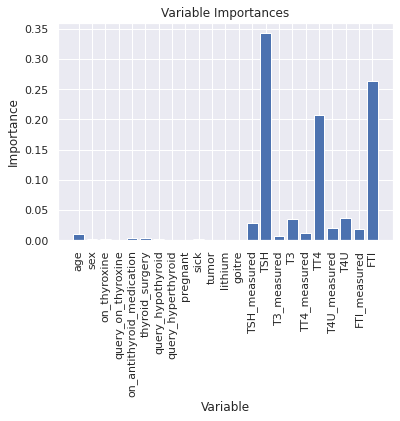

In [68]:
##We can also visualize the above

import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Ada Boost Classifier**

In [69]:
##Splitting data on our important features

X= data[['TSH','FTI','TT4','T3','T4U','age']]
y = data.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:
##Creating our baseline model

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.9799789251844047
Mean Absolute Error: 0.020021074815595362
Mean Squared Error: 0.020021074815595362
Root Mean Squared Error: 0.14149584734399578


In [71]:
X.shape

(3163, 6)

In [72]:
y.shape

(3163,)

In [73]:
from sklearn.ensemble import AdaBoostClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                          n_estimators=100)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)



In [74]:
##Lets evaluate the metrics for our boosted model


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("Accuracy:",ada_boost.score(X, y))

Mean Absolute Error: 0.020021074815595362
Mean Squared Error: 0.020021074815595362
Root Mean Squared Error: 0.14149584734399578
Accuracy: 0.9962061334176415


In [75]:
##We can see that compared to our baseline model which had an accuracy of 96%, our boosted model had a 99% accuracy and a low RSME

**SVM Model**

In [76]:
##We will fit our models using the linear, polynomial and rbf kernels and compare performance of each

In [77]:
##Importing our important libraries
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

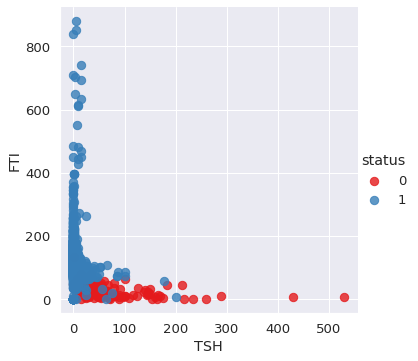

In [78]:
# Plotting and visualizing the top two our important features
sns.lmplot('TSH','FTI', data=hypothyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

**Fitting a linear SVC model**

In [79]:
##Defining our variables
##We will use best features chosen in our models above to define our X
dff = hypothyroid.copy()


# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dff['status']= label_encoder.fit_transform(dff['status'])
  
print(dff['status'].unique())

X = dff[['TSH','FTI','TT4','T3','T4U','age']]
y = dff.status

# Standardizing our data
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit_transform(X)

[0 1]


In [80]:
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
# Instantiating and fitting our linear model

model_1= SVC(kernel='linear')
  
model_1= model_1.fit(X_train,y_train)

# making prediction
y_pred = model_1.predict(X_test)

In [82]:
#Evaluating the linear models performance

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.02423603793466807
Mean Squared Error: 0.02423603793466807
Root Mean Squared Error: 0.1556792790793562
The accuracy of the linear model is  0.9757639620653319


**Fitting using a polynomial svc model**

In [83]:
#For non-linear kernel, we use the gamma parameter to improve the perfomance.A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting.


In [84]:
# Building the model  #auto _derecated
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [86]:
# Model Evaluation
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the ploynomial model is ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Root Mean Squared Error: 0.18362925952195544
The accuracy of the ploynomial model is  0.9662802950474183
[[ 12  27]
 [  5 905]]


**Fitting an rbf kernal SVC model**

In [87]:
#Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [89]:
# Model Evaluation
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the rbf model is ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Root Mean Squared Error: 0.14875670195030447
The accuracy of the rbf model is  0.9778714436248683
[[ 25  14]
 [  7 903]]


**Fitting a sigmoid kernal**

In [90]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [92]:
# Model Evaluation
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the sigmoid model is ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Root Mean Squared Error: 0.21286346217712332
The accuracy of the sigmoid model is  0.9546891464699684
[[  9  30]
 [ 13 897]]


**Conclusion**

Of all the models passed, all of the had an accuracy score of 95% and above which is a pretty good score for prediction. The worst performing model was the SVC Sigmoid Kernel which according to our confusion matrix had the highest number of failed predictions and the lowest model accuracy score of 95%. We also notice that our ensembled models (ada booster) had a slightly better performance than our baseline model owing to parameter tweaking.
We also suspected our models to be overfitted which we tried to solve by using boosting ensemble and hyperparameter tuning.

**Challenges**

**Model visualizations:** While trying to visualize classifications with various SVC models, the notebook crashed several times and delayed our runtime hence opted to remove them from this notebook